In [12]:
from trajectoryenv import TrajectoryEnv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
env = TrajectoryEnv(file_number=0)

In [3]:
for i in range(1000):
    state, _ = env.reset()
    if (np.min(state) < 0 or np.max(state) >= 1):

        print(state)
        print("Min bound")


[[ 1.15156263e-01  6.31862164e-01  5.16271114e-01  5.58265090e-01
   5.69398880e-01]
 [ 1.12090491e-01  6.30433798e-01  5.15948355e-01  5.58631480e-01
   5.59016407e-01]
 [ 1.08705282e-01  6.24773324e-01  5.15576363e-01  5.58820546e-01
   5.59016407e-01]
 [ 1.05362050e-01  6.23188853e-01  5.15223205e-01  5.58834672e-01
   5.59016407e-01]
 [ 1.01871595e-01  6.20578647e-01  5.14910161e-01  5.58896005e-01
   5.59016407e-01]
 [ 9.82541218e-02  6.18121505e-01  5.14597118e-01  5.58892310e-01
   5.59016407e-01]
 [ 9.46660638e-02  6.17165983e-01  5.13943017e-01  5.59049904e-01
   5.59016407e-01]
 [ 9.09771994e-02  6.15886271e-01  5.13215125e-01  5.59079051e-01
   5.59016407e-01]
 [ 8.70639756e-02  6.11956179e-01  5.12595952e-01  5.59059978e-01
   5.59016407e-01]
 [ 8.31731856e-02  6.10786140e-01  5.12204051e-01  5.59056103e-01
   5.59016407e-01]
 [ 7.95063823e-02  6.14056826e-01  5.11812150e-01  5.59157133e-01
   5.59016407e-01]
 [ 7.60148913e-02  6.17465854e-01  5.11781871e-01  5.59293449e-01

KeyboardInterrupt: 

In [3]:
def convert_action_to_scaled(action):
    action = (action - env.action_space_min) / \
        (env.action_space_max - env.action_space_min)
    return (action * 2) - 1


In [4]:
(np.zeros(4) + 1) / 2 * (env.action_space_max - env.action_space_min) + env.action_space_min

array([ 0.3 ,  0.05, -0.1 ,  0.  ])

In [5]:
env.reset()

(array([[0.5298458 , 0.6845299 , 0.5284479 , 0.5588666 , 0.5650273 ],
        [0.52953696, 0.6899192 , 0.5296422 , 0.55942917, 0.5590164 ],
        [0.52931005, 0.6951579 , 0.5305826 , 0.5572037 , 0.5590164 ],
        [0.5288491 , 0.68816024, 0.53131825, 0.555813  , 0.5590164 ],
        [0.5285429 , 0.68971723, 0.53059655, 0.55396473, 0.5590164 ],
        [0.5290118 , 0.70544887, 0.5298748 , 0.55297124, 0.5590164 ],
        [0.5284943 , 0.69623065, 0.5307162 , 0.5515453 , 0.5590164 ],
        [0.5287484 , 0.703352  , 0.5324114 , 0.5465797 , 0.5590164 ],
        [0.5286674 , 0.7001733 , 0.5337287 , 0.5464435 , 0.5590164 ],
        [0.5285985 , 0.69904274, 0.5324177 , 0.5456322 , 0.5590164 ],
        [0.5289766 , 0.7066996 , 0.5311067 , 0.5455656 , 0.5590164 ],
        [0.52879333, 0.7016902 , 0.5300744 , 0.54619116, 0.5590164 ],
        [0.52932507, 0.7097897 , 0.5291993 , 0.54606575, 0.5590164 ],
        [0.52920586, 0.70331466, 0.52852446, 0.54615295, 0.5590164 ],
        [0.529643  ,

In [6]:
obs, reward, done, truncated, info = env.step(np.array([0,0,0,0]))

In [7]:
print(reward)

-0.00305448024971


In [9]:
env.reset()
done = False
rewards = []
while not done:
    obs, reward, done, truncated, info = env.step(np.array([0.00,0,0,0]))
    rewards.append(reward)
env.render()
env.close()

In [10]:
np.sum(rewards)

-7.559138583297424

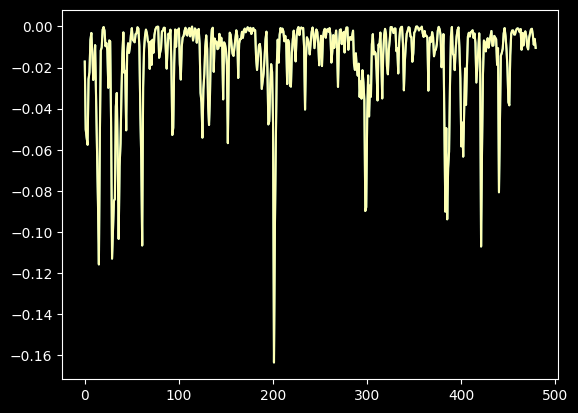

In [13]:
plt.plot(np.array(rewards))
plt.show()

In [14]:
# load ppo model from local
from stable_baselines3 import PPO

model = PPO.load("./models/ppo_model_9920000_steps.zip")


In [15]:
# try model on env
obs, _ = env.reset()
done = False
action_history = []
rewards = []
while not done:
    action, _ = model.predict(obs)
    action_history.append(action)
    obs, reward, done, truncated, info = env.step(action)
    rewards.append(reward)
env.render()
env.close()

<Figure size 640x480 with 0 Axes>

In [16]:
action_history[1]


array([ 0.4192915 ,  0.94825566,  0.45803598, -0.63450223], dtype=float32)

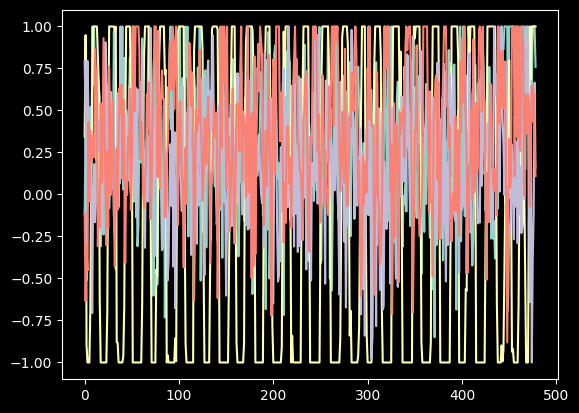

In [17]:

plt.plot(action_history)
plt.show()


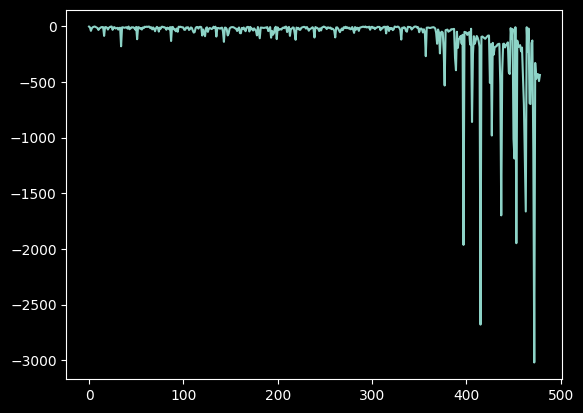

In [18]:
plt.plot(rewards)
